In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#convert RBG to GREY

In [ ]:
import os
from PIL import Image

dirname_read="/content/drive/My Drive/aps360project/car/"   
dirname_write="/content/drive/My Drive/aps360project/car1/"
names=os.listdir(dirname_read)
count=0
for name in names:
    img=Image.open(dirname_read+name)
    name=name.split(".")
    if name[-1] == "png":
        name[-1] = "jpg"
        name = str.join(".", name)
        #r,g,b,a=img.split()              
        #img=Image.merge("RGB",(r,g,b))   
        to_save_path = dirname_write + name
        img.save(to_save_path)
        count+=1
        print(to_save_path, "------conut：",count)
    else:
        continue



KeyboardInterrupt: ignored

In [ ]:
from PIL import Image

import os
input_dir = '/content/drive/My Drive/aps360project/demo1/'
out_dir = '/content/drive/My Drive/aps360project/demo2/'
a = os.listdir(input_dir)
for i in a:
  print(i)
  I = ((Image.open(input_dir+i)).convert('L')).save(out_dir+i)


08-L-4955.jpg


In [ ]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skimage.io import imread
from skimage.filters import threshold_otsu


In [ ]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import imutils


from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import shutil
import cv2

In [ ]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
out_dir2 = '/content/drive/My Drive/aps360project/demo3/'
out_dir = '/content/drive/My Drive/aps360project/demo2/'
a2 = os.listdir(out_dir)
for i in a2:
  print(i) 
  # Read Image 
  img= Image.open(out_dir+i)  
  # Convert Image to Numpy as array 
  #img = np.array(img)  
  # Put threshold to make it binary
  binarr = img.point(lambda img: 0 if img<128 else 255, '1')  #binarization 
  binarr.save(out_dir2+i)
  # Covert numpy array back to image 
  #binimg = Image.fromarray(binarr)


08-L-4955.jpg


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skimage.io import imread
from skimage.filters import threshold_otsu

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O','P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]

def read_training_data(training_directory):
    image_data = []
    target_data = []
    for each_letter in letters:
        for each in range(10):
            image_path = os.path.join('/content/drive/MyDrive/aps360project/'+training_directory, each_letter, each_letter + '_' + str(each) + '.jpg')
            im = Image.open(image_path)
            x_s = 20 #define standard width
            y_s = 20 #calc height based on standard width
            out = im.resize((x_s,y_s),Image.ANTIALIAS) #resize image with high-quality
            out.save(image_path)
            # read each image of each character
            img_details = imread(image_path, as_gray=True)
            # converts each character image to binary image
            binary_image = img_details < threshold_otsu(img_details)
            # the 2D array of each image is flattened because the machine learning
            # classifier requires that each sample is a 1D array
            # therefore the 20*20 image becomes 1*400
            # in machine learning terms that's 400 features with each pixel
            # representing a feature
            flat_bin_image = binary_image.reshape(-1)
            image_data.append(flat_bin_image)
            target_data.append(each_letter)

    return (np.array(image_data), np.array(target_data))

def cross_validation(model, num_of_fold, train_data, train_label):
    # this uses the concept of cross validation to measure the accuracy
    # of a model, the num_of_fold determines the type of validation
    # e.g if num_of_fold is 4, then we are performing a 4-fold cross validation
    # it will divide the dataset into 4 and use 1/4 of it for testing
    # and the remaining 3/4 for the training
    accuracy_result = cross_val_score(model, train_data, train_label,
                                      cv=num_of_fold)
    print("Cross Validation Result for ", str(num_of_fold), " -fold")

    print(accuracy_result * 100)


# current_dir = os.path.dirname(os.path.realpath(__file__))
#
# training_dataset_dir = os.path.join(current_dir, 'train')
print('reading data')
training_dataset_dir = './train20X20'
image_data, target_data = read_training_data(training_dataset_dir)
print('reading data completed')

# the kernel can be 'linear', 'poly' or 'rbf'
# the probability was set to True so as to show
# how sure the model is of it's prediction
svc_model = SVC(kernel='linear', probability=True)

cross_validation(svc_model, 4, image_data, target_data)

print('training model')

# let's train the model with all the input data
svc_model.fit(image_data, target_data)

import pickle
print("model trained.saving model..")
filename = './finalized_model.sav'
pickle.dump(svc_model, open(filename, 'wb'))
print("model saved")

reading data
reading data completed
Cross Validation Result for  4  -fold
[93.33333333 94.44444444 93.33333333 95.55555556]
training model
model trained.saving model..
model saved


In [ ]:
import os
from PIL import Image

In [ ]:
import pickle

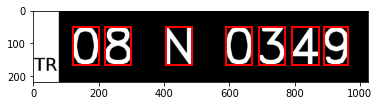

Predicted license plate
08N0349
Real License Plate
08N0349


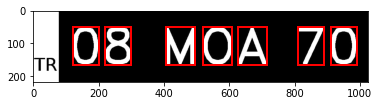

Predicted license plate
08I0A70
Real License Plate
08MOA70


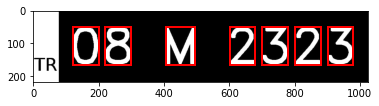

Predicted license plate
08IZ3Z3
Real License Plate
08M2323


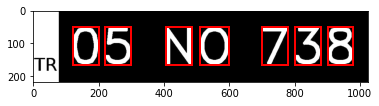

Predicted license plate
05N0738
Real License Plate
05NO738


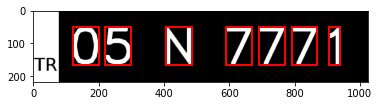

Predicted license plate
05N777I
Real License Plate
05N7771


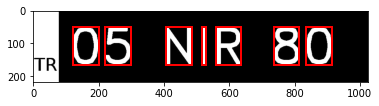

Predicted license plate
05NOR80
Real License Plate
05NIR80


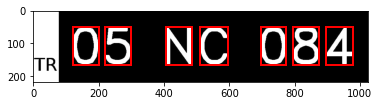

Predicted license plate
05NC084
Real License Plate
05NC084


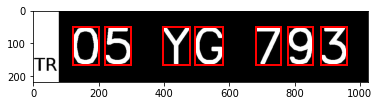

Predicted license plate
05YG793
Real License Plate
05YG793


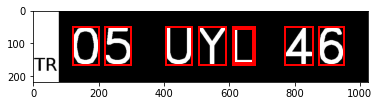

Predicted license plate
05UYL46L
Real License Plate
05UYL46


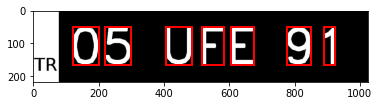

Predicted license plate
05UFE9I
Real License Plate
05UFE91


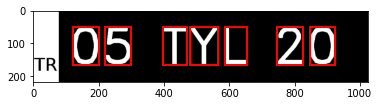

Predicted license plate
05TYLZ0
Real License Plate
05TYL20


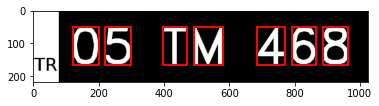

Predicted license plate
05TI468
Real License Plate
05TM468


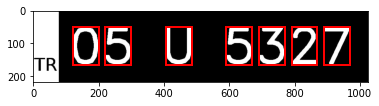

Predicted license plate
05U53Z7
Real License Plate
05U5327


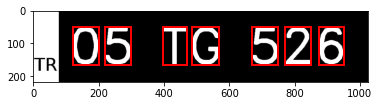

Predicted license plate
05TG5Z6
Real License Plate
05TG526


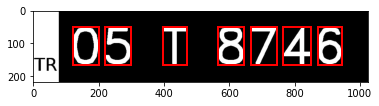

Predicted license plate
05T8746
Real License Plate
05T8746


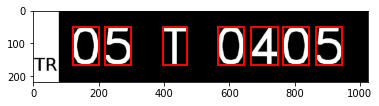

Predicted license plate
05T0405
Real License Plate
05T0405


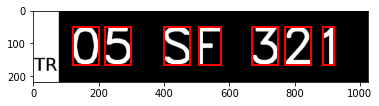

Predicted license plate
05SF3ZI
Real License Plate
05SF321


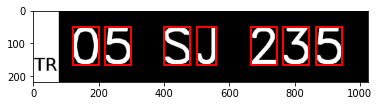

Predicted license plate
05SJZ35
Real License Plate
05SJ235


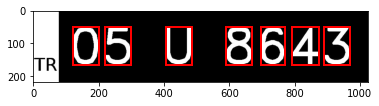

Predicted license plate
05U8643
Real License Plate
05U8643


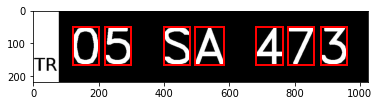

Predicted license plate
05SA473
Real License Plate
05SA473


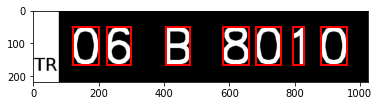

Predicted license plate
06B80I0
Real License Plate
06B8010


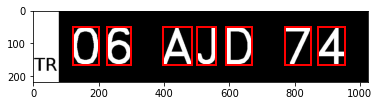

Predicted license plate
06AJD74
Real License Plate
06AJD74


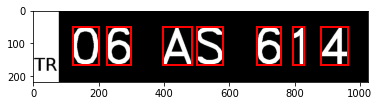

Predicted license plate
06AS6I4
Real License Plate
06AS614


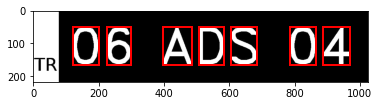

Predicted license plate
06ADS04
Real License Plate
06ADS04


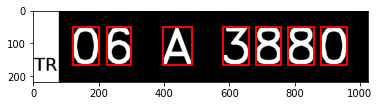

Predicted license plate
06A3880
Real License Plate
06A3880


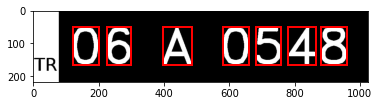

Predicted license plate
06A0548
Real License Plate
06A0548


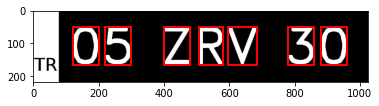

Predicted license plate
05ZRV30
Real License Plate
05ZRV30


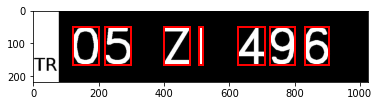

Predicted license plate
05ZO496
Real License Plate
05ZI496


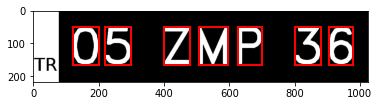

Predicted license plate
05ZIP36
Real License Plate
05ZMP36


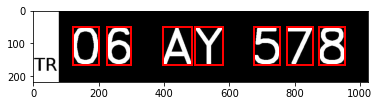

Predicted license plate
06AY578
Real License Plate
06AY578


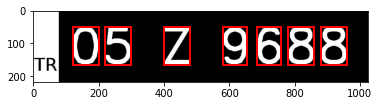

Predicted license plate
05Z9688
Real License Plate
05Z9688


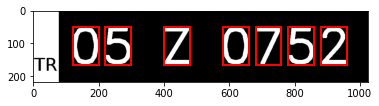

Predicted license plate
05Z075Z
Real License Plate
05Z0752


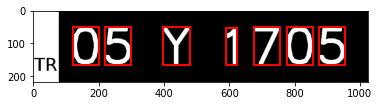

Predicted license plate
05Y705I
Real License Plate
05Y1705


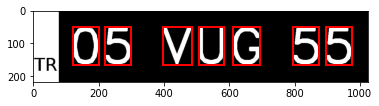

Predicted license plate
05VUG55
Real License Plate
05VUG55


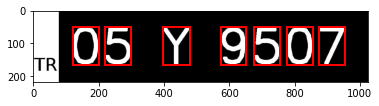

Predicted license plate
05Y9507
Real License Plate
05Y9507


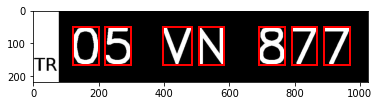

Predicted license plate
05VN877
Real License Plate
05VN877


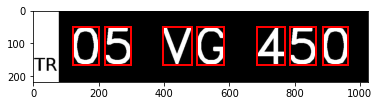

Predicted license plate
05VG450
Real License Plate
05VG450


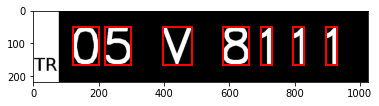

Predicted license plate
05V8III
Real License Plate
05V8111


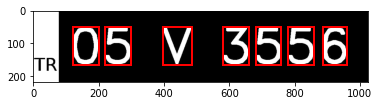

Predicted license plate
05V3556
Real License Plate
05V3556


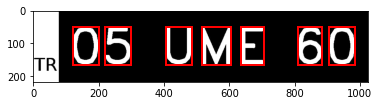

Predicted license plate
05UHE60
Real License Plate
05UME60


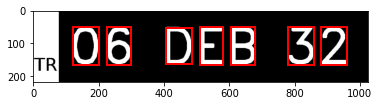

Predicted license plate
06EB3ZD
Real License Plate
06DEB32


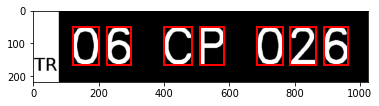

Predicted license plate
06CP0Z6
Real License Plate
06CP026


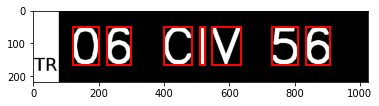

Predicted license plate
06COV56
Real License Plate
06CIV56


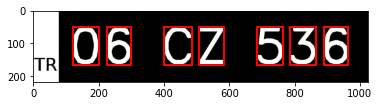

Predicted license plate
06CZ536
Real License Plate
06CZ536


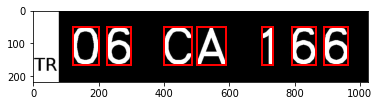

Predicted license plate
06CAI66
Real License Plate
06CA166


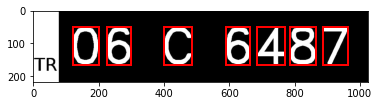

Predicted license plate
06C6487
Real License Plate
06C6487


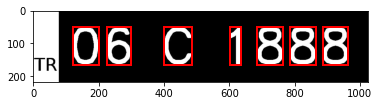

Predicted license plate
06CI888
Real License Plate
06C1888


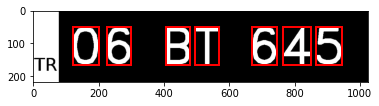

Predicted license plate
06BT645
Real License Plate
06BT645


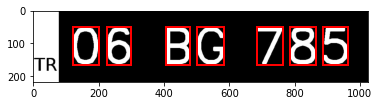

Predicted license plate
06BG785
Real License Plate
06BG785


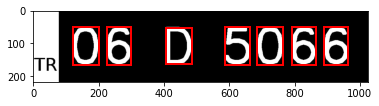

Predicted license plate
065066D
Real License Plate
06D5066


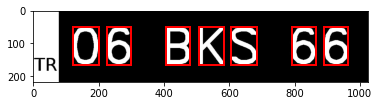

Predicted license plate
06BKS66
Real License Plate
06BKS66


In [ ]:
out_dir2 = '/content/drive/My Drive/aps360project/car3/'
correct=0
total=0

a2 = os.listdir(out_dir2)
count=0
for i in a2:
  total+=1
 
  if(count>50):
    break
  # Read Image 
  img= Image.open(out_dir2+i)  
  # The invert was done so as to convert the black pixel to white pixel and vice versa
  license_plate = np.invert(img)
  labelled_plate = measure.label(license_plate)
  count+=1



  fig, ax1 = plt.subplots(1)
  ax1.imshow(license_plate, cmap="gray")
  # the next two lines is based on the assumptions that the width of
  # a license plate should be between 5% and 15% of the license plate,
  # and height should be between 35% and 60%
  # this will eliminate some
  character_dimensions = (0.35*license_plate.shape[0], 0.9*license_plate.shape[0], 0.01*license_plate.shape[1], 0.9*license_plate.shape[1])
  min_height, max_height, min_width, max_width = character_dimensions

  characters = []
  counter=0
  column_list = []
  for regions in regionprops(labelled_plate):
      y0, x0, y1, x1 = regions.bbox
      region_height = y1 - y0
      region_width = x1 - x0

      if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
          roi = license_plate[y0:y1, x0:x1]

          # draw a red bordered rectangle over the character.
          rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                        linewidth=2, fill=False)
          ax1.add_patch(rect_border)

          # resize the characters to 20X20 and then append each character into the characters list
          resized_char = resize(roi, (20, 20))
          characters.append(resized_char)

          # this is just to keep track of the arrangement of the characters
          column_list.append(x0)
  #print(characters)
  plt.show()
  
  #print("Loading model") #svc model
  filename = './finalized_model.sav'
  model = pickle.load(open(filename, 'rb'))

  #print('Model loaded. Predicting characters of number plate')
  classification_result = []
  for each_character in characters:
      # converts it to a 1D array
      each_character = each_character.reshape(1, -1);
      result = model.predict(each_character)
      classification_result.append(result)



  plate_string = ''
  for eachPredict in classification_result:
      plate_string += eachPredict[0]
      #print(plate_string)

  print('Predicted license plate')
  print(plate_string)

  #following is compared to the label

  x=i.rstrip(".jpg")
  x=x.replace( '-' , '')

  print('Real License Plate')
  print(x)



In [ ]:
print("Acc")
print("86.3630137")

Acc
86.3630137
